<a href="https://colab.research.google.com/github/raghavenderreddy1707/Disease-predicter/blob/main/diseasepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raghavenderreddy1707","key":"8589adac0441beeebb85268bf662e67d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 35.9MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
numaric_cols = df.select_dtypes(include='number').columns
df[numaric_cols] = df[numaric_cols].fillna(df[numaric_cols].mean())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

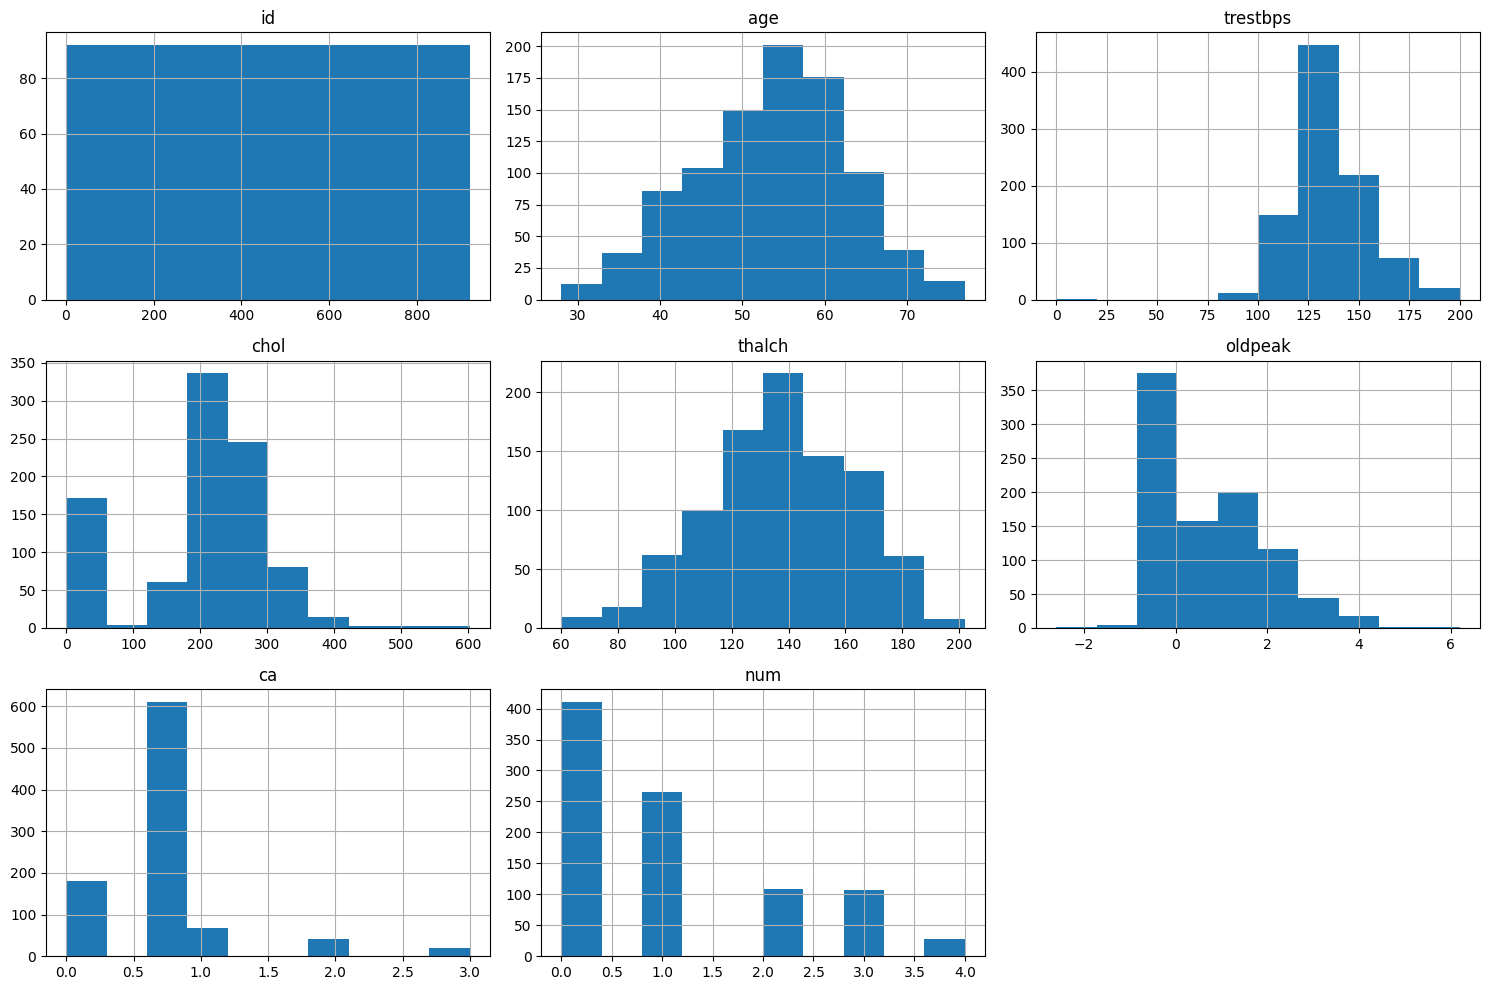

In [ ]:
df[numaric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

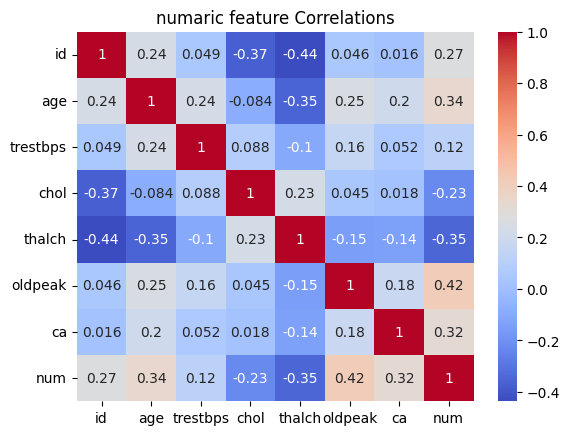

In [ ]:
sns.heatmap(df[numaric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('numaric feature Correlations')
plt.show()

DAY 02 - Model Training

In [ ]:
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')


In [ ]:
x = df.drop('num',axis=1)
y = (df['num'] > 0).astype(int)

In [ ]:
x = pd.get_dummies(x,columns=cat_cols)
print("Final feature columns:",x.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


Day 3: Advanced models & features engineering

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

new value =(x-mean)/standard deviation

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression  #its about classification

In [ ]:
lr_model = LogisticRegression() #giving admission to a new student
lr_model.fit(X_train_scaled, y_train) #traning stop

LogisticRegression()

Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pread_lr = lr_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pread_lr))
print(classification_report(y_test,y_pread_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



Accuracy score - 75 to 98 conisdered to be good

Day 4 random forest ,and feature importance

In [ ]:
from sklearn.metrics import confusion_matrix

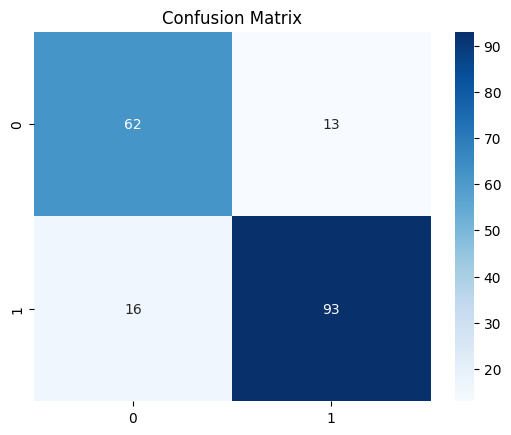

In [ ]:
cn = confusion_matrix(y_test,y_pread_lr)
sns.heatmap(cn,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)


In [ ]:
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


feature importance

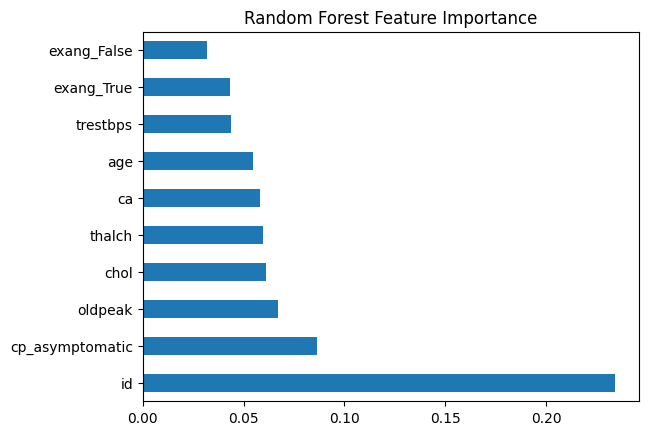

In [ ]:
feat_imp = pd.Series(rf_model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

Save The Model

In [ ]:
import joblib
joblib.dump(rf_model,'heart_disease_model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [ ]:
joblib.dump(scaler, "heart_scaler.pkl")

['heart_scaler.pkl']

In [ ]:
sample = x.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User Template saved as 'Heart_user_template.csv'")

User Template saved as 'Heart_user_template.csv'


DAY 05 - user Upload & Prediction

In [ ]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num\n1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0\n2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2\n3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1\n4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0\n5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0\n6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0\n7,62,Female,Cleveland,asymptomatic,140,268,FALSE,lv hypertrophy,160,FALSE,3.6,downsloping,2,normal,3\n8,57,Female,Cleveland,asymptomatic,120,354,FALSE,normal,163,TRUE,0.6,upsloping,0,normal,0\n9,63,Male,Cleveland,asymptomatic,130,254,FALSE,lv hypertrophy,147,FALSE,1.4,flat,1,reversable defect,2\n10

In [37]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

#getting columns list from training dataframe
numaric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(exclude='number').columns.tolist()
bool_cols = ['exang', 'fbs']

#dropping columns which are extra in user_df than required to avoid error
numaric_cols = [col for col in numaric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

#fill the missing numaric column & cat column &bool column
user_df[numaric_cols] = user_df[numaric_cols].fillna(user_df[numaric_cols].mean())

# Fill missing categorical columns with 'unknown'
for col in cat_cols:
    if col not in bool_cols: # Ensure we don't fill boolean columns with 'unknown'
        user_df[col] = user_df[col].fillna('unknown')

# Fill missing boolean columns with 0 and convert to int
for col in bool_cols:
    user_df[col] = user_df[col].fillna(0).astype(int)


#one-hot encoding cat columns
user_df_encoded=pd.get_dummies(user_df,columns=[col for col in cat_cols if col not in bool_cols]) # Only one-hot encode non-boolean categorical columns


#allign columns
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)


#Scale data
scaler = joblib.load('heart_scaler.pkl')
user_df_scaled = scaler.transform(user_df_encoded)

#prediction
model=joblib.load('heart_disease_model.pkl')
preds = model.predict(user_df_scaled)
user_df['Heart_Disease_Prediction'] = preds
#
print(user_df)

      id  age     sex        dataset               cp    trestbps   chol  fbs  \
0      1   63    Male      Cleveland   typical angina  145.000000  233.0    1   
1      2   67    Male      Cleveland     asymptomatic  160.000000  286.0    0   
2      3   67    Male      Cleveland     asymptomatic  120.000000  229.0    0   
3      4   37    Male      Cleveland      non-anginal  130.000000  250.0    0   
4      5   41  Female      Cleveland  atypical angina  130.000000  204.0    0   
..   ...  ...     ...            ...              ...         ...    ...  ...   
915  916   54  Female  VA Long Beach     asymptomatic  127.000000  333.0    1   
916  917   62    Male  VA Long Beach   typical angina  132.132404  139.0    0   
917  918   55    Male  VA Long Beach     asymptomatic  122.000000  223.0    1   
918  919   58    Male  VA Long Beach     asymptomatic  132.132404  385.0    1   
919  920   62    Male  VA Long Beach  atypical angina  120.000000  254.0    0   

              restecg      